<a href="https://colab.research.google.com/github/mbroda2000/Python_projekt/blob/michal/hypothesis%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Proposed hypothesis

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
data = pd.read_csv('drive/MyDrive/Data_ML.csv')

In [5]:
data.head(100)

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,<35,No,Master,1,Woman,No,NotDev,9,2,United States of America,193000.0,Ansible;Docker;Git;AWS;Microsoft SQL Server,5,0
96,96,<35,No,Undergraduate,1,Man,Yes,Dev,9,4,Greece,28536.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Doc...,14,0
97,97,>35,No,Master,1,Man,No,NotDev,4,2,Australia,96874.0,C#;HTML/CSS;Matlab;Python;R;SQL;Git;Django;Fla...,14,0
98,98,>35,No,Undergraduate,1,Man,No,Dev,24,14,United Kingdom of Great Britain and Northern I...,77556.0,Bash/Shell;Java;JavaScript;Node.js;Python;Type...,15,1


In [65]:
filtered_data = data[data['YearsCodePro'] == 0]
# Transformation of'MentalHealth' (1-Yes, 0-No)
filtered_data['MentalHealth'] = (filtered_data['MentalHealth'] == 'Yes')
print(filtered_data['ComputerSkills'].max())
# Display the result
print(filtered_data)

105
       Unnamed: 0  Age Accessibility        EdLevel  Employment Gender  \
13             13  <35            No  Undergraduate           1    Man   
47             47  <35            No     NoHigherEd           1    Man   
137           137  >35            No          Other           1    Man   
163           163  <35            No  Undergraduate           1    Man   
275           275  <35            No  Undergraduate           1  Woman   
...           ...  ...           ...            ...         ...    ...   
73227       73227  <35            No  Undergraduate           1    Man   
73245       73245  <35            No  Undergraduate           1    Man   
73250       73250  <35            No  Undergraduate           0    Man   
73307       73307  <35            No     NoHigherEd           1    Man   
73340       73340  <35            No  Undergraduate           1    Man   

       MentalHealth MainBranch  YearsCode  YearsCodePro  \
13            False        Dev          8       

([<matplotlib.axis.XTick at 0x7d4ea1aa9600>,
 [Text(0, 0, 'Not Employed'), Text(1, 0, 'Employed')])

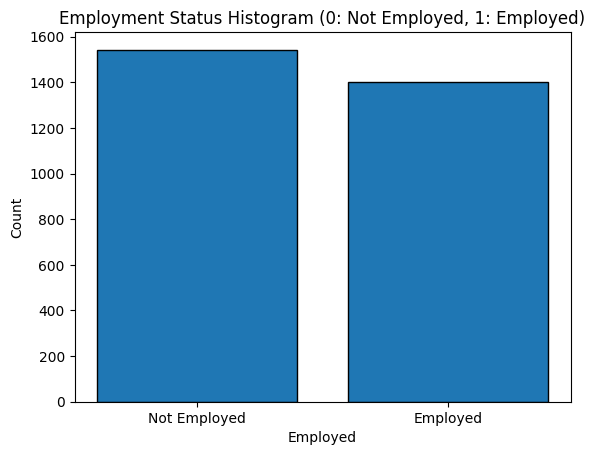

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
plt.hist(filtered_data['Employed'], bins=[-0.5, 0.5, 1.5], edgecolor='black', rwidth=0.8)

# Customize the plot
plt.xlabel('Employed')
plt.ylabel('Count')
plt.title('Employment Status Histogram (0: Not Employed, 1: Employed)')
plt.xticks([0, 1], ['Not Employed', 'Employed'])

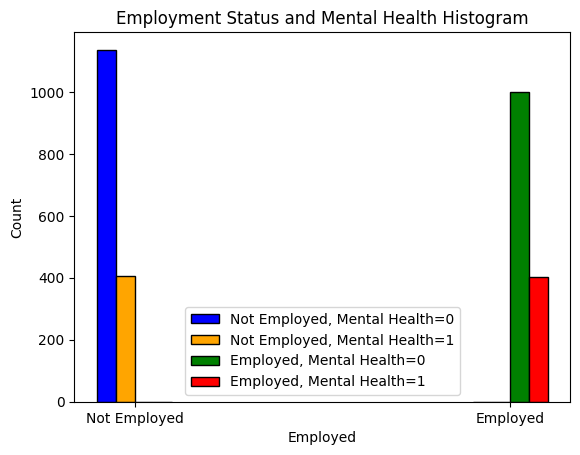

In [35]:
data=filtered_data
plt.hist([data[(data['Employed'] == 0) & (data['MentalHealth'] == 0)]['Employed'],
          data[(data['Employed'] == 0) & (data['MentalHealth'] == 1)]['Employed'],
          data[(data['Employed'] == 1) & (data['MentalHealth'] == 0)]['Employed'],
          data[(data['Employed'] == 1) & (data['MentalHealth'] == 1)]['Employed']],
         bins=[-0.5, 0.5, 1.5], edgecolor='black', rwidth=0.2,
         color=['blue', 'orange', 'green', 'red'], label=['Not Employed, Mental Health=0', 'Not Employed, Mental Health=1',
                                                         'Employed, Mental Health=0', 'Employed, Mental Health=1'])

# Customize the plot
plt.xlabel('Employed')
plt.ylabel('Count')
plt.title('Employment Status and Mental Health Histogram')
plt.xticks([0, 1], ['Not Employed', 'Employed'])
plt.legend()

# Show the plot
plt.show()

In [37]:
not_employed_data = filtered_data[filtered_data['Employed'] == 0]
employed_data = filtered_data[filtered_data['Employed'] == 1]

In [73]:
not_employed_data['Category of experience'] = pd.cut(not_employed_data['ComputerSkills'],
                                       bins=[-1, 5, 10, 15, 20, 30, 40],
                                       labels=[1, 2, 3, 4, 5, 6])

# Wyświetlanie zaktualizowanego DataFrame
print(not_employed_data)

       Unnamed: 0  Age Accessibility        EdLevel  Employment Gender  \
13             13  <35            No  Undergraduate           1    Man   
47             47  <35            No     NoHigherEd           1    Man   
163           163  <35            No  Undergraduate           1    Man   
275           275  <35            No  Undergraduate           1  Woman   
282           282  <35            No  Undergraduate           1    Man   
...           ...  ...           ...            ...         ...    ...   
73184       73184  <35            No  Undergraduate           1    Man   
73216       73216  >35            No     NoHigherEd           1    Man   
73227       73227  <35            No  Undergraduate           1    Man   
73245       73245  <35            No  Undergraduate           1    Man   
73307       73307  <35            No     NoHigherEd           1    Man   

       MentalHealth MainBranch  YearsCode  YearsCodePro  \
13            False        Dev          8           

<ipython-input-73-9a1e9a96e446>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_employed_data['Category of experience'] = pd.cut(not_employed_data['ComputerSkills'],


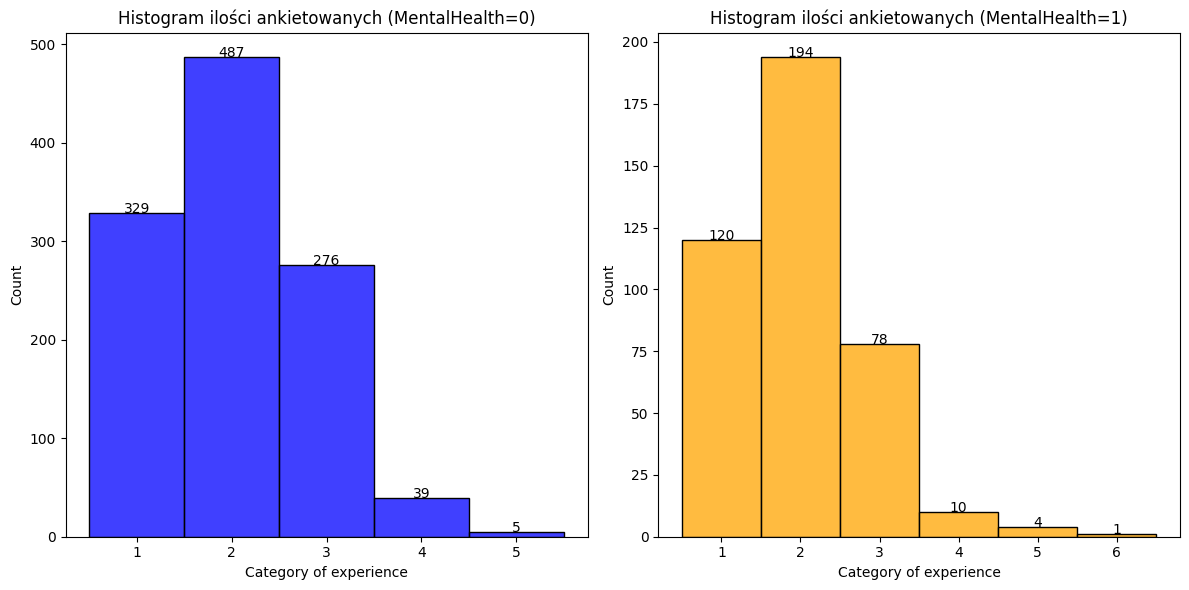

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Rysowanie dwóch histogramów
plt.figure(figsize=(12, 6))

# Histogram dla osób z 'MentalHealth' równym 0
plt.subplot(1, 2, 1)
ax1 = sns.histplot(not_employed_data[not_employed_data['MentalHealth'] == 0]['Category of experience'],
                   bins=[1, 2, 3, 4, 5, 6, 7], color='blue', edgecolor='black')
plt.xlabel('Category of experience')
plt.ylabel('Count')
plt.title('Histogram ilości ankietowanych (MentalHealth=0)')

# Dodanie liczb nad słupkami
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='baseline')

# Histogram dla osób z 'MentalHealth' równym 1
plt.subplot(1, 2, 2)
ax2 = sns.histplot(not_employed_data[not_employed_data['MentalHealth'] == 1]['Category of experience'],
                   bins=[1, 2, 3, 4, 5, 6, 7], color='orange', edgecolor='black')
plt.xlabel('Category of experience')
plt.ylabel('Count')
plt.title('Histogram ilości ankietowanych (MentalHealth=1)')

# Dodanie liczb nad słupkami
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='baseline')

# Wyświetlenie wykresów
plt.tight_layout()
plt.show()




In [ ]:
#
#
#sprawdzimy to na przykładzie ludzi którzy się dostali
#

In [63]:
employed_data['Category of experience'] = pd.cut(employed_data['ComputerSkills'],
                                       bins=[-1, 5, 10, 15, 20, 30, 40],
                                       labels=[1, 2, 3, 4, 5, 6])

# Wyświetlanie zaktualizowanego DataFrame
print(employed_data)

       Unnamed: 0  Age Accessibility        EdLevel  Employment Gender  \
137           137  >35            No          Other           1    Man   
287           287  <35            No          Other           0    Man   
328           328  <35            No     NoHigherEd           1    Man   
425           425  <35            No     NoHigherEd           1    Man   
452           452  <35            No  Undergraduate           1    Man   
...           ...  ...           ...            ...         ...    ...   
73061       73061  <35            No     NoHigherEd           1    Man   
73076       73076  <35            No         Master           1    Man   
73164       73164  >35            No  Undergraduate           1  Woman   
73250       73250  <35            No  Undergraduate           0    Man   
73340       73340  <35            No  Undergraduate           1    Man   

       MentalHealth MainBranch  YearsCode  YearsCodePro  \
137           False        Dev          5           

<ipython-input-63-73a43579c585>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employed_data['Category of experience'] = pd.cut(employed_data['ComputerSkills'],


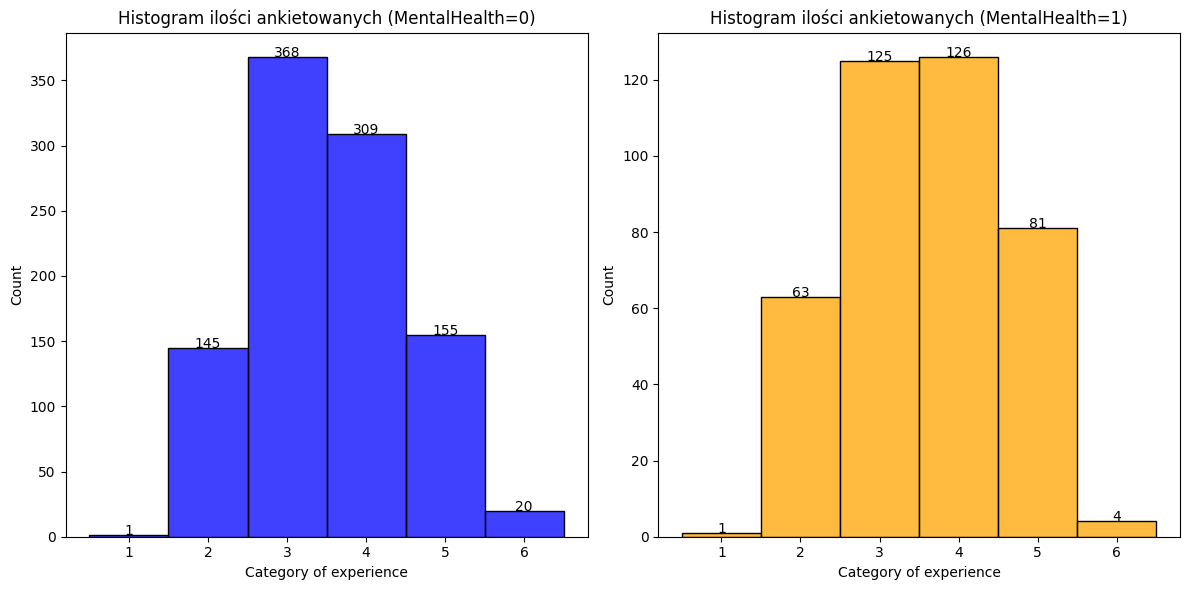

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Rysowanie dwóch histogramów
plt.figure(figsize=(12, 6))

# Histogram dla osób z 'MentalHealth' równym 0
plt.subplot(1, 2, 1)
ax1 = sns.histplot(employed_data[employed_data['MentalHealth'] == 0]['Category of experience'],
                   bins=[1, 2, 3, 4, 5, 6, 7], color='blue', edgecolor='black')
plt.xlabel('Category of experience')
plt.ylabel('Count')
plt.title('Histogram ilości ankietowanych (MentalHealth=0)')

# Dodanie liczb nad słupkami
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='baseline')

# Histogram dla osób z 'MentalHealth' równym 1
plt.subplot(1, 2, 2)
ax2 = sns.histplot(employed_data[employed_data['MentalHealth'] == 1]['Category of experience'],
                   bins=[1, 2, 3, 4, 5, 6, 7], color='orange', edgecolor='black')
plt.xlabel('Category of experience')
plt.ylabel('Count')
plt.title('Histogram ilości ankietowanych (MentalHealth=1)')

# Dodanie liczb nad słupkami
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='baseline')

# Wyświetlenie wykresów
plt.tight_layout()
plt.show()